STOCK MARKET ANALYSIS USING PYTHON

Analyze the stock performance of Apple, Microsoft, Netflix, and Google over a three-month period. This project identifies price trends, calculates moving averages and volatility, and explores correlations between companies using Python.

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')


In [2]:
# =======<<<<<< Load and Inspect Dataset >>>>>>=======
file_path = 'stocks.xlsx'  # Ensure the file is in the same directory
data = pd.read_excel(file_path)

# Preview data
print("First 5 rows of the data:")
print(data.head())

# Check for missing values
print("\nMissing values in dataset:")
print(data.isnull().sum())

# Basic dataset info
print("\nDataset Information:")
print(data.info())

# Basic descriptive statistics
print("\nDescriptive Statistics:")
print(data.describe())

# Check unique companies
print("\nUnique Tickers in data:")
print(data['Ticker'].unique())


First 5 rows of the data:
  Ticker       Date        Open        High         Low       Close  \
0   AAPL 2023-02-07  150.639999  155.229996  150.639999  154.649994   
1   AAPL 2023-02-08  153.880005  154.580002  151.169998  151.919998   
2   AAPL 2023-02-09  153.779999  154.330002  150.419998  150.869995   
3   AAPL 2023-02-10  149.460007  151.339996  149.220001  151.009995   
4   AAPL 2023-02-13  150.949997  154.259995  150.919998  153.850006   

    Adj Close    Volume  
0  154.414230  83322600  
1  151.688400  64120100  
2  150.639999  56007100  
3  151.009995  57450700  
4  153.850006  62199000  

Missing values in dataset:
Ticker       0
Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 248 entries, 0 to 247
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Ticke

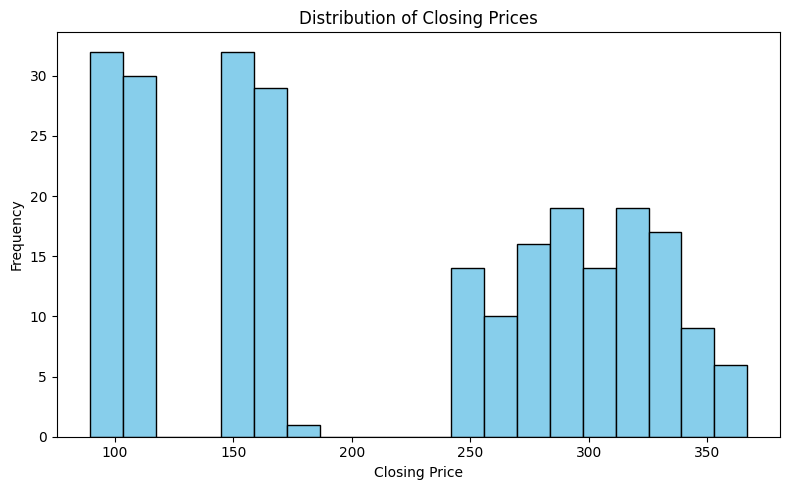

In [3]:
# Closing Price Distribution
plt.figure(figsize=(8,5))
plt.hist(data['Close'], bins=20, color='skyblue', edgecolor='black')
plt.xlabel('Closing Price')
plt.ylabel('Frequency')
plt.title('Distribution of Closing Prices')
plt.tight_layout()
plt.show()


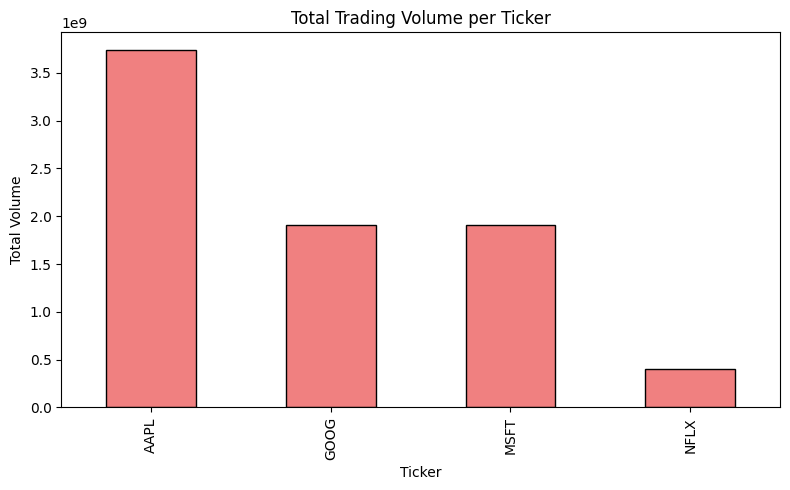

In [4]:
# Total Volume by Ticker
plt.figure(figsize=(8,5))
volume_per_ticker = data.groupby('Ticker')['Volume'].sum()
volume_per_ticker.plot(kind='bar', color='lightcoral', edgecolor='black')
plt.xlabel('Ticker')
plt.ylabel('Total Volume')
plt.title('Total Trading Volume per Ticker')
plt.tight_layout()
plt.show()


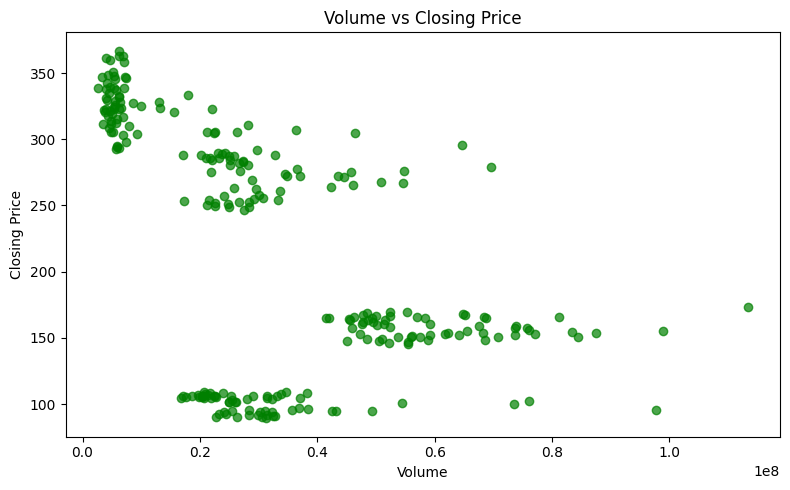

In [5]:
# Volume vs Closing Price Scatter Plot
plt.figure(figsize=(8,5))
plt.scatter(data['Volume'], data['Close'], alpha=0.7, color='green')
plt.xlabel('Volume')
plt.ylabel('Closing Price')
plt.title('Volume vs Closing Price')
plt.tight_layout()
plt.show()


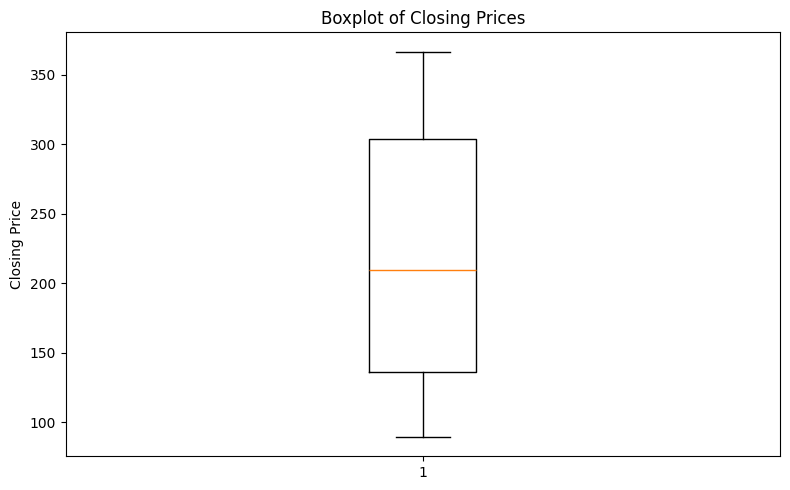

In [6]:
# Boxplot for Closing Prices
plt.figure(figsize=(8,5))
plt.boxplot(data['Close'], vert=True)
plt.ylabel('Closing Price')
plt.title('Boxplot of Closing Prices')
plt.tight_layout()
plt.show()


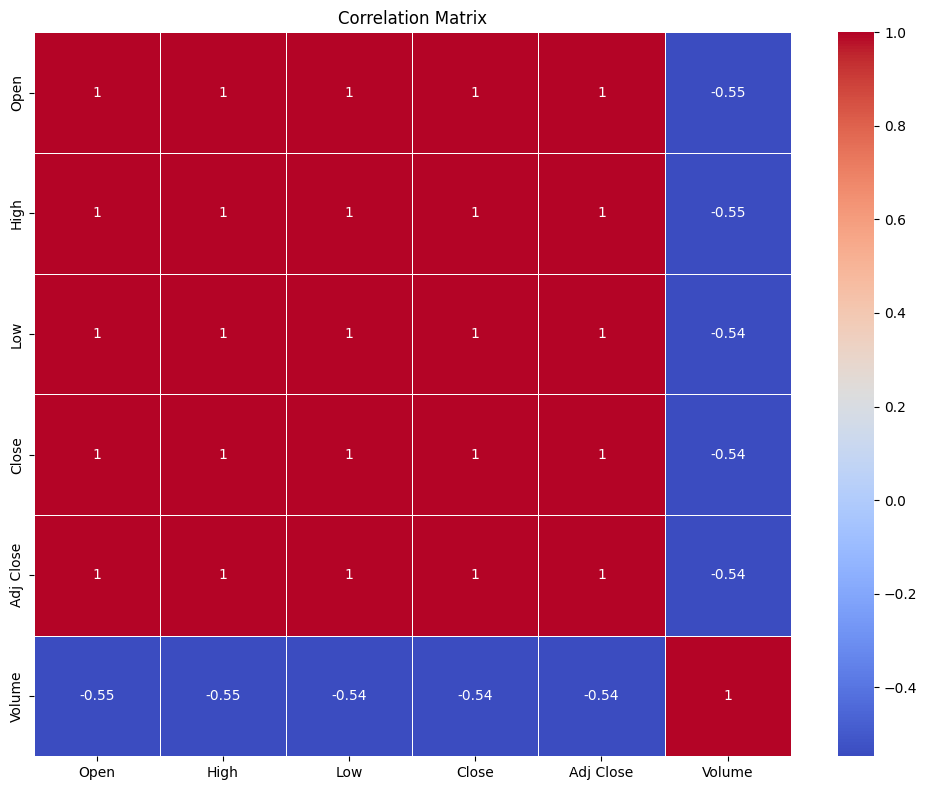

In [7]:
# Correlation Heatmap for numerical features
plt.figure(figsize=(10,8))
correlation_matrix = data[['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.tight_layout()
plt.show()


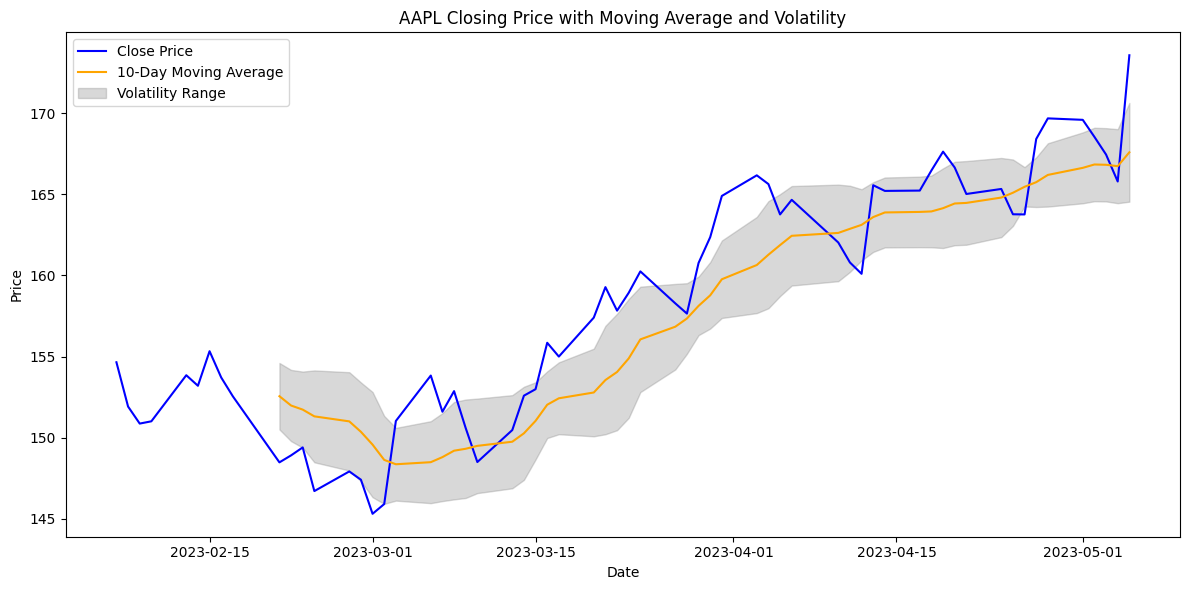

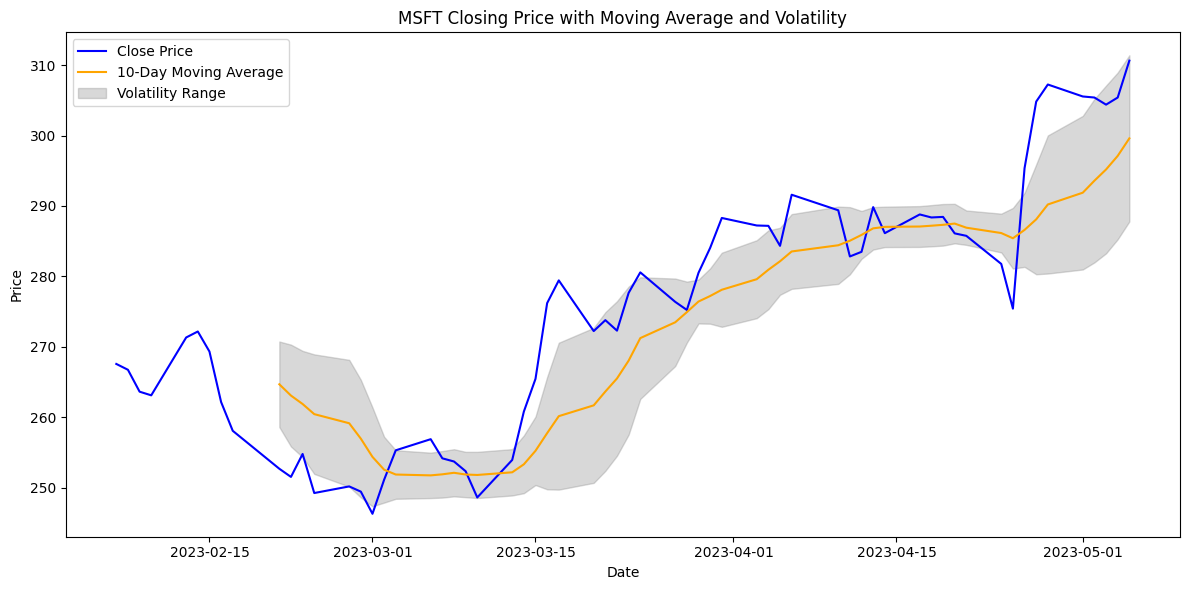

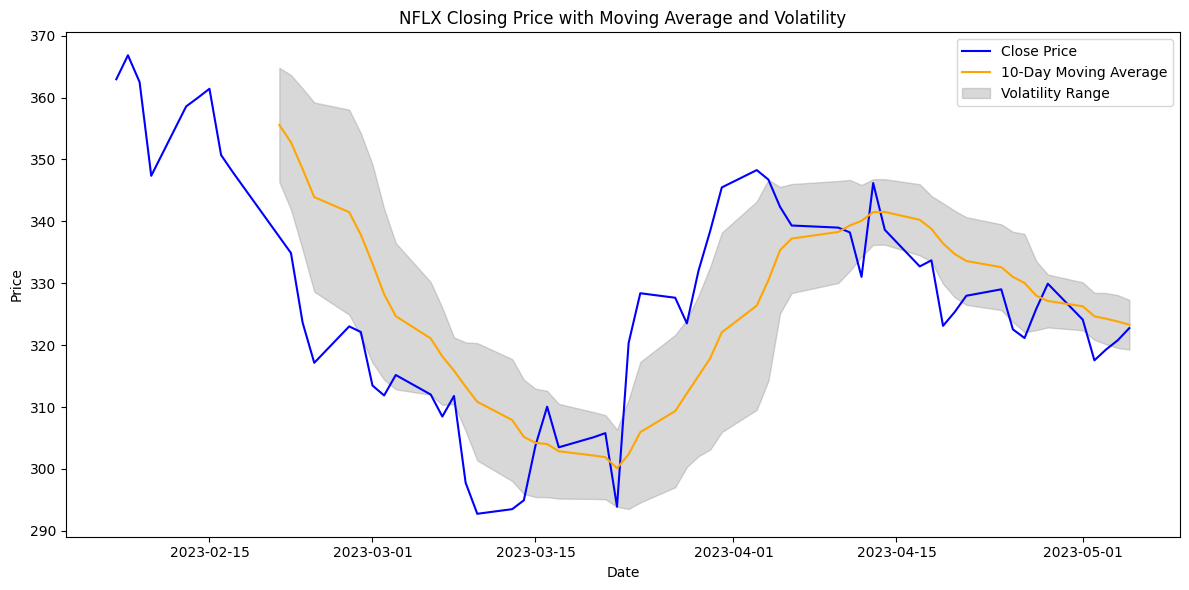

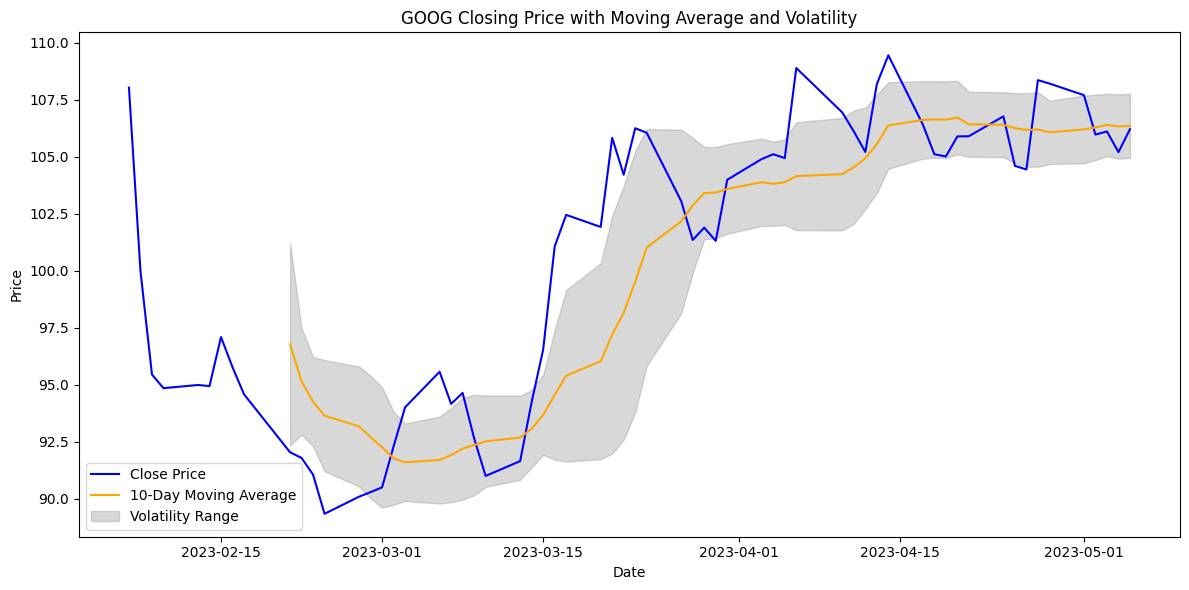

In [8]:
# =======<<<<<< Moving Averages & Volatility >>>>>>=======

tickers = data['Ticker'].unique()

for ticker in tickers:
    ticker_data = data[data['Ticker'] == ticker].sort_values('Date')
    ticker_data['MA_10'] = ticker_data['Close'].rolling(window=10).mean()
    ticker_data['Volatility'] = ticker_data['Close'].rolling(window=10).std()

    plt.figure(figsize=(12,6))
    plt.plot(ticker_data['Date'], ticker_data['Close'], label='Close Price', color='blue')
    plt.plot(ticker_data['Date'], ticker_data['MA_10'], label='10-Day Moving Average', color='orange')
    plt.fill_between(ticker_data['Date'], 
                     ticker_data['MA_10'] - ticker_data['Volatility'], 
                     ticker_data['MA_10'] + ticker_data['Volatility'], 
                     color='gray', alpha=0.3, label='Volatility Range')
    plt.title(f'{ticker} Closing Price with Moving Average and Volatility')
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.legend()
    plt.tight_layout()
    plt.show()


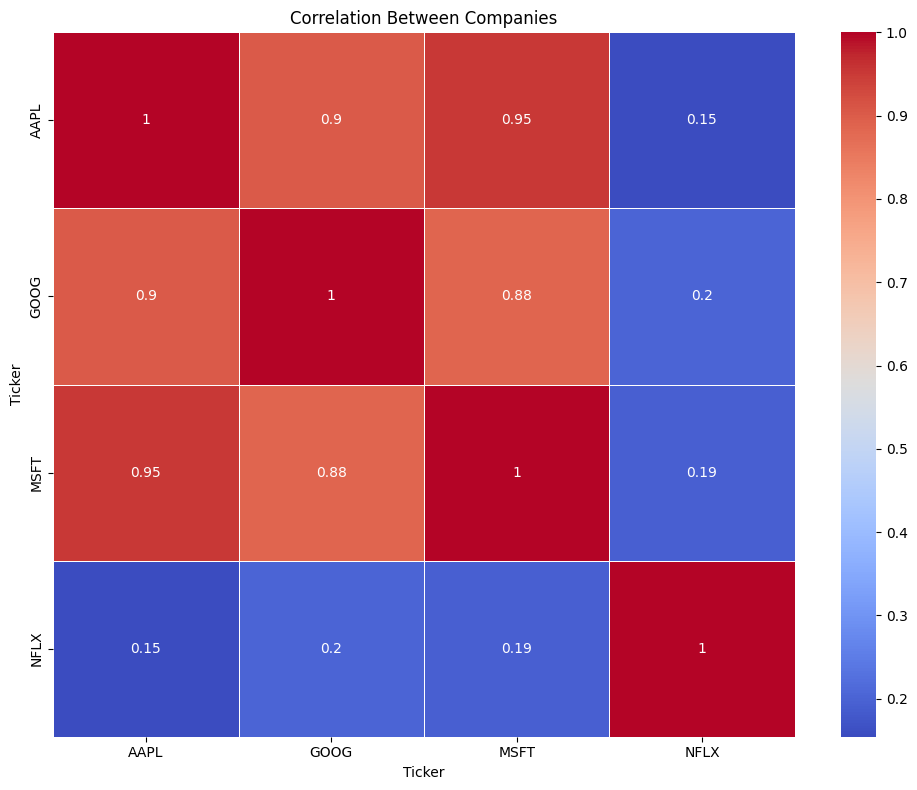

In [9]:
# =======<<<<<< Cross-Ticker Correlation >>>>>>=======

# Create a pivot table with tickers as columns and dates as index
pivot_data = data.pivot(index='Date', columns='Ticker', values='Close')
pivot_data.dropna(inplace=True)

plt.figure(figsize=(10,8))
sns.heatmap(pivot_data.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Between Companies')
plt.tight_layout()
plt.show()